In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import ipywidgets as widgets
from IPython.display import display

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Hyperparameters & locations
</div>

In [2]:
locs = {'waiting_folder' : '../data/waiting times'}

<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Reading the data
</div>

In [3]:
waiting_times = list()
for attraction in tqdm(os.listdir(locs['waiting_folder'])):
    filename = os.path.join(locs['waiting_folder'], attraction)
    df = pd.read_csv(filename)
    if df.empty:
        continue
    df.insert(0, 'attraction', attraction.split('.')[0])
    waiting_times.append(df)

df_wait_raw = pd.concat(waiting_times, ignore_index=True)

100%|██████████| 52/52 [00:06<00:00,  8.03it/s]


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Cleaning the data
</div>

In [4]:
df_wait = df_wait_raw.copy()
# Cleaning the actual waiting times
# Removing outliers from actuals
df_wait = df_wait[((df_wait.SACTMIN >= -1000) & (df_wait.SACTMIN < 360)) | (df_wait.SACTMIN.isnull())]
# Removing outliers from posted (attraction closed at -999)
df_wait = df_wait[(df_wait.SPOSTMIN >= -998.99) | (df_wait.SPOSTMIN.isnull())]

df_wait['date'] = pd.to_datetime(df_wait.date, format = '%m/%d/%Y')
df_wait['datetime'] = pd.to_datetime(df_wait.datetime, format = '%Y-%m-%d %H:%M:%S')

print(f"Removed {len(df_wait_raw) - len(df_wait)} rows")

# You could split the dataset into two seperate dataframes (plusjes & minnetjes :-))
df_wait_act = df_wait[~df_wait.SACTMIN.isnull()].drop('SPOSTMIN', axis = 1)
df_wait_post = df_wait[~df_wait.SPOSTMIN.isnull()].drop('SACTMIN', axis = 1)

attractions = df_wait.attraction.unique()

Removed 1318703 rows


<div style="background-color: rgba(0, 176, 240, 1); color: rgba(255, 255, 255, 1); font-size: 24px; font-weight: bold; padding: 10px; border-radius: 15px;">
    Visualizing the data that we have in a very simple way
</div>

In [5]:
df_wait_post.groupby('attraction')['SPOSTMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
7_dwarfs_train,290934.0,76.962455,33.993364,0.0,50.0,70.0,95.0,300.0
alien_saucers,121772.0,29.863351,15.998896,0.0,20.0,30.0,40.0,190.0
astro_orbiter,274923.0,27.026822,13.458805,0.0,20.0,25.0,35.0,180.0
barnstormer,286649.0,19.227069,14.330115,0.0,5.0,15.0,25.0,120.0
big_thunder_mtn,274544.0,37.630817,23.339693,0.0,20.0,35.0,50.0,300.0
buzz_lightyear,296459.0,31.639333,19.493587,0.0,15.0,30.0,45.0,160.0
carousel_of_progress,36096.0,6.333389,3.586248,0.0,5.0,5.0,5.0,80.0
country_bears,10691.0,14.968665,8.613217,0.0,10.0,10.0,20.0,45.0
dinosaur,228624.0,27.399704,19.630231,0.0,10.0,20.0,40.0,300.0


In [6]:
df_wait_act.groupby('attraction')['SACTMIN'].describe()

,count,mean,std,min,25%,50%,75%,max
attraction,,,,,,,,
7_dwarfs_train,7634.0,36.166623,22.950125,0.0,21.0,31.0,46.00,217.0
alien_saucers,3031.0,22.068624,12.586751,0.0,13.0,21.0,30.00,79.0
astro_orbiter,1770.0,20.402260,9.501468,0.0,14.0,20.0,26.00,65.0
barnstormer,3087.0,12.528345,9.900399,0.0,5.0,11.0,18.00,70.0
big_thunder_mtn,11729.0,18.251513,12.913191,0.0,9.0,16.0,25.00,125.0
buzz_lightyear,7998.0,14.120780,12.355926,0.0,5.0,11.0,20.00,109.0
carousel_of_progress,876.0,4.179224,4.455348,0.0,1.0,2.0,6.00,33.0
country_bears,362.0,7.842541,7.213412,0.0,2.0,6.0,11.00,40.0
dinosaur,5059.0,20.197075,15.332370,0.0,8.0,17.0,29.00,96.0


In [7]:
# Create a dropdown widget for selecting attractions
attraction_dropdown = widgets.Dropdown(
    options=attractions,
    description='Attraction:',
    value=attractions[0]  # Default value
)

# Function to update the plot based on selected attraction
def update_plot(attraction):
    plt.figure(figsize=(12, 4))  # Create a new figure
    plt.subplot(1, 2, 1)  # First subplot
    df_wait_attraction = df_wait.query("attraction == @attraction")
    df_wait_attraction.SACTMIN.plot.hist(bins=30, title='Actual waiting times')
    
    plt.subplot(1, 2, 2)  # Second subplot
    df_wait_attraction.SPOSTMIN.plot.hist(bins=np.arange(-2.5, df_wait.SPOSTMIN.max() + 2.5, 10), title='Posted waiting times')
    
    plt.tight_layout()

# Link the dropdown to the update function
interactive_plot = widgets.interactive(update_plot, attraction=attraction_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Attraction:', options=('7_dwarfs_train', 'alien_saucers', 'astro_o…

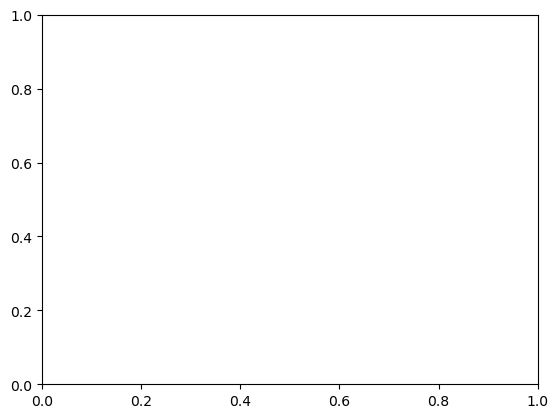

In [8]:
fig, ax = plt.subplots()



In [9]:
df_sorted = df.sort_values(by="datetime")
df_sorted.head()

,attraction,date,datetime,SACTMIN,SPOSTMIN
0,winnie_the_pooh,01/01/2015,2015-01-01 07:09:12,NaN,5.0
1,winnie_the_pooh,01/01/2015,2015-01-01 07:16:12,NaN,5.0
2,winnie_the_pooh,01/01/2015,2015-01-01 07:23:12,NaN,5.0
3,winnie_the_pooh,01/01/2015,2015-01-01 07:29:12,NaN,5.0
4,winnie_the_pooh,01/01/2015,2015-01-01 07:37:12,NaN,5.0


In [10]:
# Use shift() to get previous and next posted wait times
df_sorted['previous_posted_wait'] = df_sorted['SPOSTMIN'].shift(1)
df_sorted['next_posted_wait'] = df_sorted['SPOSTMIN'].shift(-1)
df_sorted.head()

,attraction,date,datetime,SACTMIN,SPOSTMIN,previous_posted_wait,next_posted_wait
0,winnie_the_pooh,01/01/2015,2015-01-01 07:09:12,NaN,5.0,NaN,5.0
1,winnie_the_pooh,01/01/2015,2015-01-01 07:16:12,NaN,5.0,5.0,5.0
2,winnie_the_pooh,01/01/2015,2015-01-01 07:23:12,NaN,5.0,5.0,5.0
3,winnie_the_pooh,01/01/2015,2015-01-01 07:29:12,NaN,5.0,5.0,5.0
4,winnie_the_pooh,01/01/2015,2015-01-01 07:37:12,NaN,5.0,5.0,5.0


In [11]:
# Use interpolation to estimate posted wait time for actual timestamps
df_wait_act['estimated_posted_wait'] = np.interp(
    df_wait_act['SACTMIN'].astype(np.int64),  # Convert datetime to int
    df_wait_post['SPOSTMIN'].astype(np.int64),
    df_wait_post['SPOSTMIN']
)
df_wait_act.head()

,attraction,date,datetime,SACTMIN,estimated_posted_wait
2,7_dwarfs_train,2015-01-01,2015-01-01 08:05:30,54.0,5.0
5,7_dwarfs_train,2015-01-01,2015-01-01 08:22:16,55.0,5.0
177,7_dwarfs_train,2015-01-02,2015-01-02 12:20:00,160.0,5.0
264,7_dwarfs_train,2015-01-02,2015-01-02 21:49:47,65.0,5.0
281,7_dwarfs_train,2015-01-02,2015-01-03 00:44:09,19.0,5.0


In [12]:
# Convert to minutes since midnight
# df['minutes_since_midnight'] = df['timestamp'].dt.hour * 60 + df['timestamp'].dt.minute

In [13]:
from scipy.interpolate import interp1d

# ✅ Convert timestamps to UNIX time (seconds since epoch)
df_wait['timestamp_num'] = df_wait['datetime'].astype('int64') // 10**9  # Convert to seconds # Convert timestamps to int for interpolation

# Create interpolation function
interp_func = interp1d(df_wait['timestamp_num'], df_wait['SPOSTMIN'], kind='linear', fill_value="extrapolate")

# Apply interpolation to actual wait times
df_wait['interpolated_posted_wait'] = interp_func(df_wait['timestamp_num'])

df_wait.head()


c:\Users\isabe\anaconda3\Lib\site-packages\scipy\interpolate\_interpolate.py:712: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\isabe\anaconda3\Lib\site-packages\scipy\interpolate\_interpolate.py:715: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


,attraction,date,datetime,SACTMIN,SPOSTMIN,timestamp_num,interpolated_posted_wait
0,7_dwarfs_train,2015-01-01,2015-01-01 07:51:12,NaN,45.0,1420098672,45.0
1,7_dwarfs_train,2015-01-01,2015-01-01 08:02:13,NaN,60.0,1420099333,60.0
2,7_dwarfs_train,2015-01-01,2015-01-01 08:05:30,54.0,NaN,1420099530,NaN
3,7_dwarfs_train,2015-01-01,2015-01-01 08:09:12,NaN,60.0,1420099752,NaN
4,7_dwarfs_train,2015-01-01,2015-01-01 08:16:12,NaN,60.0,1420100172,60.0


In [14]:
# Count NaN values in each column
nan_counts = df_wait.isna().sum()

# Display the result
print(nan_counts)

attraction                        0
date                              0
datetime                          0
SACTMIN                     8795065
SPOSTMIN                     192372
timestamp_num                     0
interpolated_posted_wait    1353006
dtype: int64


In [15]:
df_wait.describe()

,date,datetime,SACTMIN,SPOSTMIN,timestamp_num,interpolated_posted_wait
count,8987437,8987437,192372.000000,8.795065e+06,8.987437e+06,7.634431e+06
mean,2018-06-27 18:44:33.542367744,2018-06-28 10:06:13.632842496,21.526568,3.521797e+01,1.530180e+09,6.428952e+01
min,2015-01-01 00:00:00,2015-01-01 07:09:12,0.000000,0.000000e+00,1.420096e+09,-7.105427e-15
25%,2016-10-29 00:00:00,2016-10-29 10:36:11,8.000000,1.000000e+01,1.477737e+09,3.500000e+01
50%,2018-06-22 00:00:00,2018-06-22 11:52:06,17.000000,3.000000e+01,1.529668e+09,6.000000e+01
75%,2019-11-30 00:00:00,2019-11-30 07:23:02,29.000000,5.000000e+01,1.575099e+09,9.000000e+01
max,2021-12-28 00:00:00,2021-12-28 23:00:27,329.000000,3.900000e+02,1.640732e+09,3.000000e+02
std,NaN,NaN,19.224254,3.020612e+01,6.441840e+07,3.838171e+01


In [16]:
# Compute the difference
df_wait['WAIT_DIFF'] = df_wait['SACTMIN'] - df_wait['SPOSTMIN']
df_wait.head()

,attraction,date,datetime,SACTMIN,SPOSTMIN,timestamp_num,interpolated_posted_wait,WAIT_DIFF
0,7_dwarfs_train,2015-01-01,2015-01-01 07:51:12,NaN,45.0,1420098672,45.0,NaN
1,7_dwarfs_train,2015-01-01,2015-01-01 08:02:13,NaN,60.0,1420099333,60.0,NaN
2,7_dwarfs_train,2015-01-01,2015-01-01 08:05:30,54.0,NaN,1420099530,NaN,NaN
3,7_dwarfs_train,2015-01-01,2015-01-01 08:09:12,NaN,60.0,1420099752,NaN,NaN
4,7_dwarfs_train,2015-01-01,2015-01-01 08:16:12,NaN,60.0,1420100172,60.0,NaN


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# Reshape data for heatmap (if needed)
#df_heatmap = df_wait[['WAIT_DIFF']].T  # Transpose to make it a 2D structure for heatmap

# Create the heatmap
#plt.figure(figsize=(8, 2))  # Adjust figure size
#sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

# Customize labels
#plt.xlabel("Index")
#plt.ylabel("")

# Show plot
#plt.show()

In [19]:
# Drop NaN values from WAIT_DIFF
df_filtered = df_wait[['WAIT_DIFF']].dropna()

# Ensure there's data left to plot
if not df_filtered.empty:
    # Reshape data for heatmap (transpose for 2D structure)
    df_heatmap = df_filtered.T  

    # Create the heatmap
    plt.figure(figsize=(8, 2))
    sns.heatmap(df_heatmap, cmap="coolwarm", annot=True, fmt=".1f", linewidths=0.5)

    # Customize labels
    plt.xlabel("Index")
    plt.ylabel("")

    # Show plot
    plt.show()
else:
    print("No valid data to display in the heatmap.")

No valid data to display in the heatmap.


In [20]:
# Count non-null values in SACTMIN for each (DATE, ATTRACTION)
data_counts = df_wait.groupby(['date', 'attraction'])['SACTMIN'].count().reset_index()

# Rename columns for clarity
data_counts.rename(columns={'SACTMIN': 'SACTMIN_COUNT'}, inplace=True)

# Sort by most data
data_counts = data_counts.sort_values(by='SACTMIN_COUNT', ascending=False)

# Display result
print(data_counts)

            date                       attraction  SACTMIN_COUNT
67401 2021-03-19                  big_thunder_mtn             34
67958 2021-04-04                  big_thunder_mtn             34
72123 2021-08-01             pirates_of_caribbean             33
69380 2021-05-14                  toy_story_mania             30
74271 2021-10-01                  big_thunder_mtn             30
...          ...                              ...            ...
55389 2019-08-30             rock_n_rollercoaster              0
55388 2019-08-30    princess_hall__rapunzel_tiana              0
55387 2019-08-30  princess_hall__cinderella_elena              0
30741 2017-10-07                    magic_carpets              0
32969 2017-12-12                  spaceship_earth              0

[77543 rows x 3 columns]


In [21]:
data_counts.head(20)

,date,attraction,SACTMIN_COUNT
67401,2021-03-19,big_thunder_mtn,34
67958,2021-04-04,big_thunder_mtn,34
72123,2021-08-01,pirates_of_caribbean,33
69380,2021-05-14,toy_story_mania,30
74271,2021-10-01,big_thunder_mtn,30
67192,2021-03-13,big_thunder_mtn,29
74613,2021-10-10,pirates_of_caribbean,28
74600,2021-10-10,expedition_everest,28
70266,2021-06-09,expedition_everest,28
72244,2021-08-05,big_thunder_mtn,27


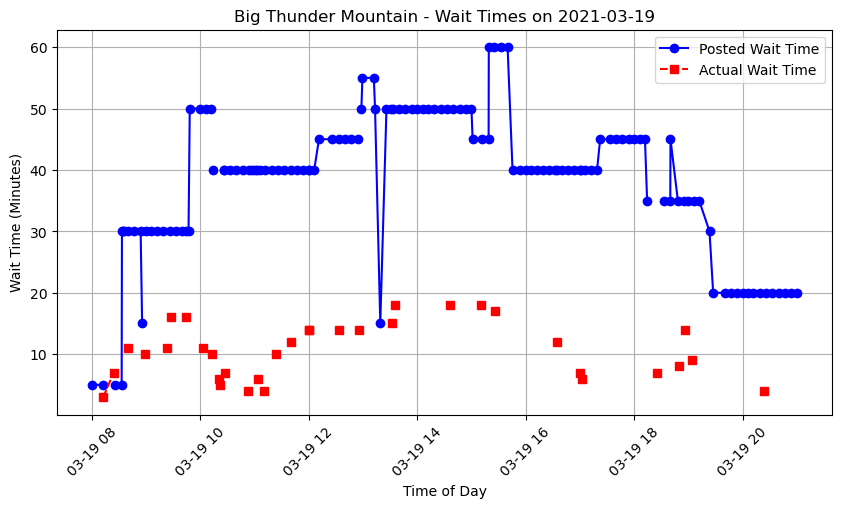

In [22]:
# Filter data for Big Thunder Mountain on 2021-03-19
filtered_df = df_wait[(df_wait['date'] == '2021-03-19') & (df_wait['attraction'] == 'big_thunder_mtn')]

# Sort by time (assuming TIME is in HH:MM format)
#filtered_df = filtered_df.sort_values(by='TIME')

# Plot actual vs posted wait times
plt.figure(figsize=(10, 5))
plt.plot(filtered_df['datetime'], filtered_df['SPOSTMIN'], marker='o', linestyle='-', label='Posted Wait Time', color='blue')
plt.plot(filtered_df['datetime'], filtered_df['SACTMIN'], marker='s', linestyle='--', label='Actual Wait Time', color='red')

# Customize the plot
plt.xlabel("Time of Day")
plt.ylabel("Wait Time (Minutes)")
plt.title("Big Thunder Mountain - Wait Times on 2021-03-19")
plt.xticks(rotation=45)  # Rotate time labels for better visibility
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
